In [208]:
# 필요한 모듈 불러오기
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torch
import glob

# 필요한 모듈 가져오기
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
plt.rcParams['figure.figsize'] = 10, 10
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline

# 연구목표
- 1차 처리된 이미지를 재처리 해서 완전한 데이터셋으로 준비하기

# 데이터 탐색

In [265]:
# 이미지 불러오기
# path = './data/normal_data/normal_processed_data/*.jpg'
path = 'C:\\Users\\bcduc\\Desktop\\workplace\\gram_opencv\\data\\normal_data\\normal_processed_data\\*.jpg'
img_name_list = glob.glob(path)
# len(img_name_list)
img_list = list()
for img in img_name_list:
    image = np.array(Image.open(img))
    img_list.append(image)

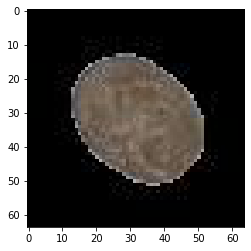

In [266]:
# 이미지 확인
plt.imshow(img_list[10])

# 데이터처리 아이디어
- 1. 이미지 컨투어를 획득한다

In [267]:
src = img_list[10]
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 180, 255, cv2.THRESH_OTSU)

# binary 이미지 확인
# cv2.imshow('binary', binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

binary = cv2.bitwise_not(binary)

# # binary 이미지 확인
# cv2.imshow('binary', binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# cv2.findContours()를 이용하여 이진화 이미지에서 윤곽선(컨투어)를 검색
# cv2.findContours(이진화 이미지, 검색 방법, 근사화 방법)을 의미 => 윤곽선, 계층 구조를 반환
# 윤곽선 : Numpy array => 윤곽선의 좌표
# 계층 구조 : 윤곽선에 해당하는 속성 정보
_, contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    # cv2.drawContours()을 이용하여 검출된 윤곽선을 그린다
    # cv2.drawContours(이미지, [윤곽선], 윤곽선 인덱스, (B, G, R), 두께, 선형 타입)
    # 윤곽선 : Numpy array
    # 윤곽선 인덱스 : 윤곽선 배열에서 몇 번째 인덱스의 윤곽선을 그릴지를 의미
    cv2.drawContours(src, [contours[i]], 0, (0,0,255), 2)
    cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, print(i, hierachy[0][i]))
    cv2.imshow('src', src)
    cv2.waitKey(0)


cv2.destroyAllWindows()

0 [-1 -1  1 -1]
1 [-1 -1 -1  0]


In [268]:
# 이미지 컨투어가 2개가 아닌 이미지들 => 노이즈 신호들이 잡힌 이미지
cnt_contours = list()
for i in range(len(img_list)):
    src = img_list[i]
    gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
    ret, binary = cv2.threshold(gray, 180, 255, cv2.THRESH_OTSU)
    binary = cv2.bitwise_not(binary)
    _, contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    if len(contours) != 2:
        cnt_contours.append(src)

In [269]:
# 노이즈 신호가 잡힌 이미지 개수 
len(cnt_contours)

792

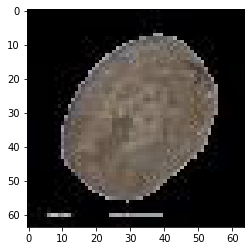

In [274]:
plt.imshow(cnt_contours[1])

In [275]:
src = cnt_contours[1]
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 180, 255, cv2.THRESH_OTSU)

# binary 이미지 확인
# cv2.imshow('binary', binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

binary = cv2.bitwise_not(binary)

# # binary 이미지 확인
# cv2.imshow('binary', binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# cv2.findContours()를 이용하여 이진화 이미지에서 윤곽선(컨투어)를 검색
# cv2.findContours(이진화 이미지, 검색 방법, 근사화 방법)을 의미 => 윤곽선, 계층 구조를 반환
# 윤곽선 : Numpy array => 윤곽선의 좌표
# 계층 구조 : 윤곽선에 해당하는 속성 정보
_, contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    # cv2.drawContours()을 이용하여 검출된 윤곽선을 그린다
    # cv2.drawContours(이미지, [윤곽선], 윤곽선 인덱스, (B, G, R), 두께, 선형 타입)
    # 윤곽선 : Numpy array
    # 윤곽선 인덱스 : 윤곽선 배열에서 몇 번째 인덱스의 윤곽선을 그릴지를 의미
    cv2.drawContours(src, [contours[i]], 0, (0,0,255), 2)
    cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, print(i, hierachy[0][i]))
    cv2.imshow('src', src)
    cv2.waitKey(0)


cv2.destroyAllWindows()

0 [-1 -1  1 -1]
1 [ 2 -1 -1  0]
2 [ 3  1 -1  0]
3 [-1  2 -1  0]


In [253]:
# plt.imshow(src)

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------


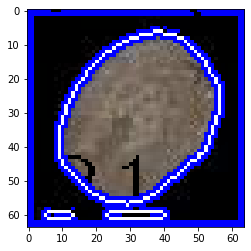

In [276]:
# 계층 구조
# [다음 윤곽선, 이전 윤곽선, 내곽 윤곽선, 외곽 윤곽선]
# 내곽 윤곽선이 없다 => 어떤 의미 ??
for idx, val in enumerate(hierachy[0]):
    if val[2] == -1:
        # print(contours[idx])
        for point in contours[idx]:
            if (1 <= point[0][1] and point[0][1] <= 62):
                # print(point)
            
                # print(point[0][1],point[0][0])
                src[point[0][1],point[0][0],:] = 255
        print('-'*50)
plt.imshow(src)

In [277]:
# 획득한 컨투어 값을 처리
hierachy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0]]], dtype=int32)

# 아이디어
- 컨투어 2번째로 길이가 긴것 => 콩 윤곽일 확률 매우 높음
- 콩의 중심으로 부터 모든 벡터를 구한다
- 중심으로 부터 윤곽까지의 벡터 최대값보다 큰 벡터들의 점은 데이터 0으로


In [ ]:
def imgPreprocessing(src, thres):
    ############################################################################
    # <이미지 노이즈 및 배경 제거>

    # 그레이 스케일로 변환
    gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
    
    # 데이터형 변환
    img_tensor = torch.LongTensor(np.array(img))

    # 바이너리로 변환
    ret, binary = cv2.threshold(gray,thres,255, cv2.THRESH_BINARY)
    binary = cv2.bitwise_not(binary)

    # 바이너리 이미지와 원본 이미지의 데이터가 일치하는 부분 만 다시 추출히기
    # tmp = np.zeros_like(src)
    # for i in range(3):
    #     tmp[:,:,i] = (src[:,:,i] * binary)

    tmp = np.zeros_like(src)
    for y in range(64):
        for x in range(64):
            if (binary != 0)[y,x]:
                for i in range(3):
                    tmp[y,x,i] = src[y,x,i]
    
    src_processed = tmp

    height = src_processed.shape[0]
    width = src_processed.shape[1]

    ############################################################################
    # <생두 무게 중심 구하기>
    R = list()
    for y in range(height):
        for x in range(width):
            if binary[y,x]:            
                R.append([x, (-y)*1j])

    # 질량의 합
    M = len(R)

    # 질량중심 벡터는 이미지를 기준으로 (x,y) => (height-y)
    R = np.array(R)
    R_x = R[:,0]
    R_y = R[:,1]

    R_x_sum = R_x.sum()
    R_y_sum = R_y.sum()

    center = np.round(R_x_sum/M).real , (np.round(R_y_sum/M)*-1j).real
    
    height_center = center[1]
    width_center = center[0]

    ############################################################################
    # <객체 외부의 노이즈 데이터 처리하기>

    # 바이너리의 윤곽선 추출
    _, contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)    

    # 생두 객체 윤곽과 윤곽벡터 구하기
    contours_leng = [len(i) for i in contours if len(i) != 252]
    
    max = np.array(contours_leng).max()
    contour_vector = list()
    for i in contours:
        if len(i) == max:
            # print(i)
            for point in i:
                contour_vector.append((point[0][1]-height_center, point[0][0]-width_center))
            
            # 윤곽 벡터 사이즈와 최대 사이즈 구하기
            vector_size = np.sqrt(np.array(contour_vector)[:,0]**2 + np.array(contour_vector)[:,1]**2 )
            max_size = vector_size.max()


    # 질량 벡터와 윤곽벡터를 비교하는 코드 짜기



    ############################################################################
    # <이미지의 중심과 생두의 무게중심 일치시키기>
    
    # 1. 이미지 센터 좌표를 구한다 
    src_center = np.array([src_processed.shape[1] / 2, src_processed.shape[0] / 2]) # (x, y)

    # 2. 객체의 중심을 구한다
    object_center = np.array([height_center, width_center]) # (x, y)

    # 3. 이미지 중심과 객체의 중심의 차이를 구한다
    delta = object_center - src_center # (x, y)

    # 4. 이미지 이동
    height, width = src_processed.shape[:2]
    M = np.float32([[1, 0, -delta[1]], [0, 1, delta[0]]]) # 이미지를 width 방향으로 delta[0]만큼 , hiehgt 방향으로 -delta[1]만큼
    img_translation = cv2.warpAffine(src_processed, M, (width,height))

    return src, binary, src_processed, img_translation

In [280]:
len(contours)

4

66.21933252457322